In [29]:
import pandas as pd
import csv

#Load Disease CSV 
def load_disease_data(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    reader = csv.reader(lines[1:], quotechar='"', skipinitialspace=True)

    data = []
    for row in reader:
        if len(row) >= 4:  # Only proceed if the row has at least 4 columns
            disease_type = row[1].strip()
            disease_name = row[2].strip()
            breed = row[3].strip().lower()
            data.append([disease_type, disease_name, breed])
    
    df = pd.DataFrame(data, columns=["Disorder", "Disease", "Breed"])
    return df

#  Load Dog Food CSV
def load_food_data(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    reader = csv.reader(lines, quotechar='"', skipinitialspace=True)
    header = next(reader)
    cleaned_header = [col.strip().lower() for col in header]
    
    valid_rows = [row for row in reader if len(row) == len(cleaned_header)]
    df = pd.DataFrame(valid_rows, columns=cleaned_header)

    # Extract only useful columns
    needed_columns = [
        "product title", "key benefits", "ingredients",
        "recommended for", "need/preference", "lifestage", "food form"
    ]
    df = df[[col for col in needed_columns if col in df.columns]]

    for col in df.columns:
        df[col] = df[col].astype(str).str.strip().str.lower()
    
    return df

#  Preview data
def preview_datasets(disease_df, food_df):
    print("\n=== Disease Sample ===")
    print(disease_df.head(), "\n")

    print("=== Food Product Sample ===")
    print(food_df.head(), "\n")

    print(f"Total breeds: {disease_df['Breed'].nunique()}")
    print(f"Total food products: {food_df['product title'].nunique()}")

# File paths
disease_file = 'Disease.csv'
food_file = 'combined_dataset_clean.csv'

disease_df = load_disease_data(disease_file)
food_df = load_food_data(food_file)
preview_datasets(disease_df, food_df)



=== Disease Sample ===
                              Disorder            Disease          Breed
0              Inherited eye disorders          Cataracts  affenpinscher
1  Inherited musculoskeletal disorders      Hip dysplasia  affenpinscher
2        Inherited endocrine disorders     Hypothyroidism   afghan hound
3              Inherited eye disorders          Cataracts   afghan hound
4              Inherited eye disorders  Retinal dysplasia   afghan hound 

=== Food Product Sample ===
                                       product title  \
0          k/d kidney care wet dog food original can   
1                          l/d wet dog food original   
2    adult large breed dry dog food with lamb & rice   
3  medium mature adult 7+ dog food with chicken d...   
4                                  t/d mini dog food   

                                        key benefits  \
0  when dogs have damage to kidney tissues, the k...   
1  the liver is your dog's largest internal organ...   
2  

In [30]:
import pandas as pd
import csv

def load_disease_data(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
    reader = csv.reader(lines[1:], quotechar='"', skipinitialspace=True)
    data = []
    for row in reader:
        if len(row) >= 4:
            disease_type = row[1].strip()
            disease_name = row[2].strip().lower()
            breed = row[3].strip().lower()
            data.append([disease_type, disease_name, breed])
    return pd.DataFrame(data, columns=["Disorder", "Disease", "Breed"])

def load_food_data(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
    reader = csv.reader(lines, quotechar='"', skipinitialspace=True)
    header = next(reader)
    cleaned_header = [col.strip().lower() for col in header]
    valid_rows = [row for row in reader if len(row) == len(cleaned_header)]
    df = pd.DataFrame(valid_rows, columns=cleaned_header)
    for col in df.columns:
        df[col] = df[col].astype(str).str.strip().str.lower()
    return df

# Keyword matching ===
def match_diseases_to_food(disease_df, food_df):
    # Map diseases to food keywords
    disease_keywords = {
        "hip dysplasia": ["joint", "mobility", "glucosamine", "chondroitin"],
        "cataracts": ["eye", "vision", "antioxidant", "vitamin a"],
        "hypothyroidism": ["thyroid", "metabolism", "weight", "energy"],
        "retinal dysplasia": ["eye", "vision", "retina", "antioxidant"],
        "glaucoma": ["eye", "pressure", "vitamin a", "omega-3"],
        "progressive retinal atrophy": ["vision", "eye", "antioxidant", "retina"],
        "liver disorder": ["liver", "detox", "amino acid", "digestive"],
        "kidney disorder": ["kidney", "renal", "phosphorus", "sodium", "protein"],
        "skin allergy": ["skin", "coat", "omega", "sensitive", "derma"],
        "hypersensitivity": ["allergy", "sensitive", "digestive", "immune"],
        "obesity": ["weight", "low fat", "weight management", "calorie"],
        "diabetes": ["glycemic", "glucose", "sugar", "metabolism"]
    }

    # Combine food benefits + ingredients for matching
    food_df["text"] = food_df.get("key benefits", "") + " " + food_df.get("ingredients", "")

    # Match
    disease_to_food = {}
    for disease, keywords in disease_keywords.items():
        matches = food_df[food_df["text"].apply(lambda text: any(kw in text for kw in keywords))]
        disease_to_food[disease] = matches["product title"].unique().tolist()
    
    return disease_to_food

disease_df = load_disease_data("Disease.csv")
food_df = load_food_data("combined_dataset_clean.csv")
disease_to_food = match_diseases_to_food(disease_df, food_df)

for disease, foods in disease_to_food.items():
    print(f"\n Disease: {disease.capitalize()}")
    if foods:
        for food in foods[:5]:  # limit to top 5
            print(f"  {food}")
    else:
        print(" No matching foods found.")



 Disease: Hip dysplasia
  adult large breed dry dog food with lamb & rice
  medium mature adult 7+ dog food with chicken dry bag
  adult large breed dry dog food with chicken
  mature adult medium dog food
  light adult large breed dry dog food with chicken

 Disease: Cataracts
  k/d kidney care wet dog food original can
  l/d wet dog food original
  adult large breed dry dog food with lamb & rice
  medium mature adult 7+ dog food with chicken dry bag
  t/d mini dog food

 Disease: Hypothyroidism
  adult large breed dry dog food with lamb & rice
  medium mature adult 7+ dog food with chicken dry bag
  adult large breed dry dog food with chicken
  mature adult medium dog food
  light adult wet dog food with chicken

 Disease: Retinal dysplasia
  t/d mini dog food
  medium puppy food
  d/d food sensitivities dry dog food with duck & rice bag
  adult large breed dry dog food with chicken
  b/d brain ageing care dry dog food with chicken bag

 Disease: Glaucoma
  k/d kidney care wet dog f

In [31]:
import pandas as pd
import csv

#  Load disease data ===
def load_disease_data(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
    reader = csv.reader(lines[1:], quotechar='"', skipinitialspace=True)
    data = []
    for row in reader:
        if len(row) >= 4:
            disease_type = row[1].strip()
            disease_name = row[2].strip().lower()
            breed = row[3].strip().lower()
            data.append([disease_type, disease_name, breed])
    return pd.DataFrame(data, columns=["Disease Type", "Disease Name", "Breed"])

#  Load food data ===
def load_food_data(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
    reader = csv.reader(lines, quotechar='"', skipinitialspace=True)
    header = next(reader)
    cleaned_header = [col.strip().lower() for col in header]
    valid_rows = [row for row in reader if len(row) == len(cleaned_header)]
    df = pd.DataFrame(valid_rows, columns=cleaned_header)
    for col in df.columns:
        df[col] = df[col].astype(str).str.strip().str.lower()
    return df

# Match diseases to food products ===
def match_diseases_to_food(food_df):
    # Expanded keyword dictionary
    disease_keywords = {
        "hip dysplasia": [
            "joint", "mobility", "glucosamine", "chondroitin",
            "healthy mobility", "arthritis", "orthopedic", "hip", "joint care"
        ],
        "cataracts": [
            "eye", "vision", "antioxidant", "vitamin a",
            "brain", "ageing", "senior vitality"
        ],
        "hypothyroidism": [
            "thyroid", "metabolism", "weight", "energy",
            "healthy weight", "vitality", "low activity", "hormonal"
        ],
        "retinal dysplasia": [
            "eye", "vision", "retina", "antioxidant",
            "c/d", "ocular", "brain ageing", "cognitive"
        ],
        "glaucoma": [
            "eye", "pressure", "vitamin a", "omega-3",
            "brain", "senior vitality"
        ],
        "progressive retinal atrophy": [
            "vision", "eye", "antioxidant", "retina",
            "cognitive", "ageing"
        ],
        "liver disorder": [
            "liver", "detox", "amino acid", "digestive",
            "l/d", "low protein", "low sodium"
        ],
        "kidney disorder": [
            "kidney", "renal", "phosphorus", "sodium", "protein",
            "k/d", "u/d", "urinary", "c/d", "multicare"
        ],
        "skin allergy": [
            "skin", "coat", "omega", "sensitive", "derma",
            "z/d", "derm", "hypoallergenic", "complete", "food sensitivities"
        ],
        "hypersensitivity": [
            "allergy", "sensitive", "digestive", "immune",
            "z/d", "hypoallergenic", "i/d", "sensitivity", "intolerance"
        ],
        "obesity": [
            "weight", "low fat", "weight management", "calorie",
            "healthy weight", "metabolic", "slimming", "fat reduction"
        ],
        "diabetes": [
            "glycemic", "glucose", "sugar", "metabolism",
            "digestive", "diabetic", "insulin", "carbohydrate"
        ]
    }

    food_df["text"] = (
        food_df.get("product title", "") + " " +
        food_df.get("key benefits", "") + " " +
        food_df.get("ingredients", "") + " " +
        food_df.get("alternate product recommendation", "")
    )

    # Match diseases to food based on keywords
    disease_to_food = {}
    for disease, keywords in disease_keywords.items():
        matches = food_df[food_df["text"].apply(lambda text: any(kw in text for kw in keywords))]
        disease_to_food[disease] = matches["product title"].unique().tolist()
    return disease_to_food

disease_df = load_disease_data("Disease.csv")
food_df = load_food_data("combined_dataset_clean.csv")

#
disease_to_food = match_diseases_to_food(food_df)

report_data = []
for disease, foods in disease_to_food.items():
    if foods:
        for food in foods:
            report_data.append([disease, food])
    else:
        report_data.append([disease, "No matching food found"])

report_df = pd.DataFrame(report_data, columns=["Disease", "Matching Food Product"])

report_df.to_csv("matched_diseases_foods.csv", index=False)

print("Report exported as 'matched_diseases_foods.csv'")


Report exported as 'matched_diseases_foods.csv'


In [32]:
import pandas as pd
import csv

def load_disease_data(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
    reader = csv.reader(lines[1:], quotechar='"', skipinitialspace=True)
    data = []
    for row in reader:
        if len(row) >= 4:
            disease_type = row[1].strip()
            disease_name = row[2].strip().lower()
            breed = row[3].strip().lower()
            data.append([disease_type, disease_name, breed])
    return pd.DataFrame(data, columns=["Disease Type", "Disease Name", "Breed"])

def load_food_data(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
    reader = csv.reader(lines, quotechar='"', skipinitialspace=True)
    header = next(reader)
    cleaned_header = [col.strip().lower() for col in header]
    valid_rows = [row for row in reader if len(row) == len(cleaned_header)]
    df = pd.DataFrame(valid_rows, columns=cleaned_header)
    for col in df.columns:
        df[col] = df[col].astype(str).str.strip().str.lower()
    return df

# Match diseases to food (expanded keyword matching)
def match_diseases_to_food(food_df):
    disease_keywords = {
        "hip dysplasia": ["joint", "mobility", "glucosamine", "chondroitin", "healthy mobility", "arthritis", "orthopedic", "hip", "joint care"],
        "cataracts": ["eye", "vision", "antioxidant", "vitamin a", "brain", "ageing", "senior vitality"],
        "hypothyroidism": ["thyroid", "metabolism", "weight", "energy", "healthy weight", "vitality", "low activity", "hormonal"],
        "retinal dysplasia": ["eye", "vision", "retina", "antioxidant", "c/d", "ocular", "brain ageing", "cognitive"],
        "glaucoma": ["eye", "pressure", "vitamin a", "omega-3", "brain", "senior vitality"],
        "progressive retinal atrophy": ["vision", "eye", "antioxidant", "retina", "cognitive", "ageing"],
        "liver disorder": ["liver", "detox", "amino acid", "digestive", "l/d", "low protein", "low sodium"],
        "kidney disorder": ["kidney", "renal", "phosphorus", "sodium", "protein", "k/d", "u/d", "urinary", "c/d", "multicare"],
        "skin allergy": ["skin", "coat", "omega", "sensitive", "derma", "z/d", "derm", "hypoallergenic", "complete", "food sensitivities"],
        "hypersensitivity": ["allergy", "sensitive", "digestive", "immune", "z/d", "hypoallergenic", "i/d", "sensitivity", "intolerance"],
        "obesity": ["weight", "low fat", "weight management", "calorie", "healthy weight", "metabolic", "slimming", "fat reduction"],
        "diabetes": ["glycemic", "glucose", "sugar", "metabolism", "digestive", "diabetic", "insulin", "carbohydrate"]
    }

    # Combine all text fields into one
    food_df["text"] = (
        food_df.get("product title", "") + " " +
        food_df.get("key benefits", "") + " " +
        food_df.get("ingredients", "") + " " +
        food_df.get("alternate product recommendation", "")
    )

    disease_to_food = {}
    for disease, keywords in disease_keywords.items():
        matches = food_df[food_df["text"].apply(lambda text: any(kw in text for kw in keywords))]
        disease_to_food[disease] = matches["product title"].unique().tolist()
    return disease_to_food

#  Match breed → disease → food
def build_breed_to_food_map(disease_df, food_df):
    disease_to_food = match_diseases_to_food(food_df)

    report_data = []

    # For each breed, find its diseases and matched foods
    grouped = disease_df.groupby("Breed")
    for breed, group in grouped:
        for _, row in group.iterrows():
            disease = row["Disease Name"]
            matched_foods = disease_to_food.get(disease, [])
            if matched_foods:
                for food in matched_foods:
                    report_data.append([breed, disease, food])
            else:
                report_data.append([breed, disease, "No matching food found"])
    
    return pd.DataFrame(report_data, columns=["Breed", "Disease", "Matching Food Product"])

disease_df = load_disease_data("Disease.csv")
food_df = load_food_data("combined_dataset_clean.csv")

# Build breed-disease-food map 
breed_food_df = build_breed_to_food_map(disease_df, food_df)
breed_food_df.to_csv("breed_disease_food_recommendations.csv", index=False)

print("Exported: 'breed_disease_food_recommendations.csv'")


Exported: 'breed_disease_food_recommendations.csv'


In [33]:
top_diseases = disease_df['Disease Name'].value_counts().head(10)
print("Top Diseases:\n", top_diseases)

Top Diseases:
 Disease Name
cataracts                                            89
progressive retinal atrophy                          83
hip dysplasia                                        71
retinal dysplasia                                    45
entropion                                            44
corneal dystrophy                                    33
cervical vertebral instability (wobbler syndrome)    30
atopy                                                30
glaucoma                                             27
intervertebral disk disease                          24
Name: count, dtype: int64


In [19]:
risky_breeds = disease_df['Breed'].value_counts().head(10)
print("Top Risky Breeds:\n", risky_breeds)

Top Risky Breeds:
 Breed
labrador retriever    35
dachshund             33
irish setter          32
doberman pinscher     31
boxer                 29
samoyed               25
golden retriever      24
chow chow             24
rottweiler            23
great dane            23
Name: count, dtype: int64


In [23]:
top_foods = breed_food_df['Matching Food Product'].value_counts().head(10)
print("Top Recommended Foods:\n", top_foods)

Top Recommended Foods:
 Matching Food Product
No matching food found                                                 915
perfect weight & active mobility small & mini dry dog food chicken     332
adult 11+ small & mini chicken, brown rice & barley recipe dog food    332
metabolic dry dog food with chicken                                    332
metabolic weight management dog food                                   332
j/d reduced calorie dry dog food                                       332
metabolic + mobility mini dog food                                     332
perfect weight & active mobility adult large dry dog food chicken      332
multi-benefit + weight adult 1+ large breed dry dog food               332
adult light small & mini with chicken meal & barley dog food           332
Name: count, dtype: int64


In [24]:
disease_coverage = breed_food_df.groupby("Disease")["Matching Food Product"].apply(
    lambda x: (x != "No matching food found").sum()
).sort_values()
print("Least Covered Diseases:\n", disease_coverage.head(10))

Least Covered Diseases:
 Disease
acanthosis nigricans                         0
pattern baldness                             0
patent ductus arteriosus (pda)               0
patellar luxation                            0
panosteitis                                  0
pannus - chronic superficial keratitis       0
pancreatitis                                 0
osteochondrodysplasia - skeletal dwarfism    0
optic nerve hypoplasia and micropapilla      0
neuroaxonal dystrophy                        0
Name: Matching Food Product, dtype: int64


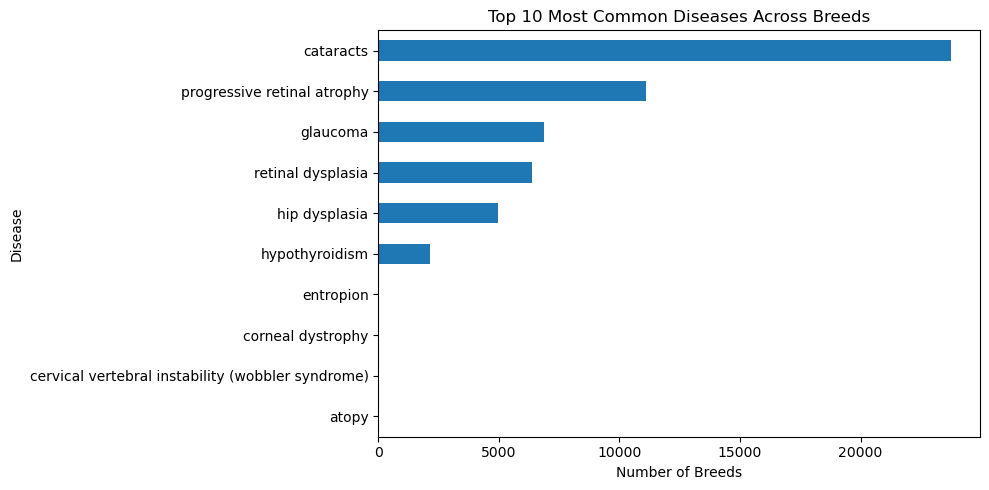

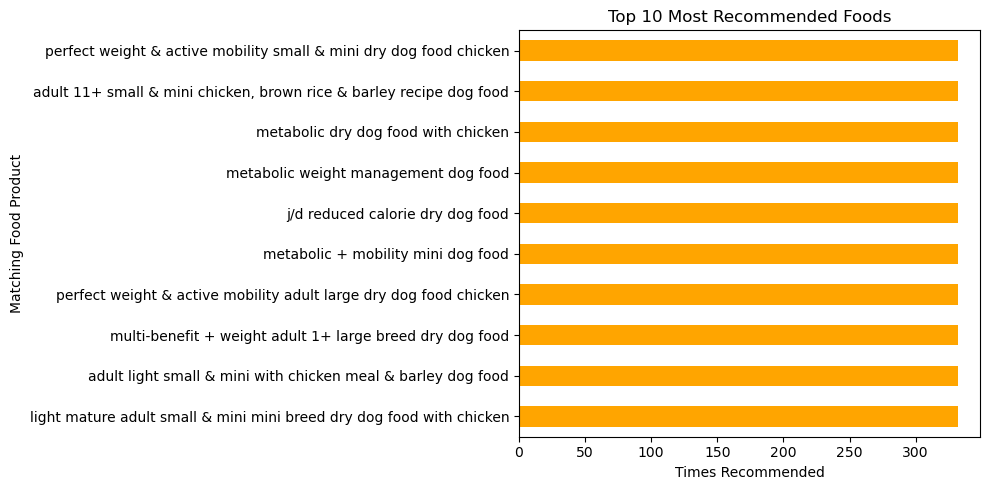

In [35]:
import matplotlib.pyplot as plt

disease_counts = breed_food_df["Disease"].value_counts().head(10)

# Count of top recommended foods (excluding 'no match')
top_foods = breed_food_df["Matching Food Product"].value_counts().drop("No matching food found", errors='ignore').head(10)

# Plot: Top 10 Most Common Diseases Across Breeds
plt.figure(figsize=(10, 5))
disease_counts.plot(kind='barh')
plt.title("Top 10 Most Common Diseases Across Breeds")
plt.xlabel("Number of Breeds")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Plot: Top 10 Most Recommended Foods
plt.figure(figsize=(10, 5))
top_foods.plot(kind='barh', color='orange')
plt.title("Top 10 Most Recommended Foods")
plt.xlabel("Times Recommended")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()